Make a big pandas dataframe to hold all the metric values we're interested in, so then we can pass it around and plot it up any way we like

I guess depth in each filter for each DDF?



In [1]:
import glob
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

In [2]:
# I just coppied them over from hyak and sym linked them to this directory for ease of use
glance_dirs = glob.glob('./*10yrs_glance')
sci_dirs = glob.glob('./*_sci')

glance_dirs.sort()
sci_dirs.sort()


In [3]:
sci_dirs


['./clouds_baseline_cloudso0_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso0_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso10_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso10_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso11_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso11_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso1_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso1_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso20_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso20_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso21_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso21_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso30_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso30_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso31_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso31_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso35_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso35_ns3_v2.2_10yrs_sci',
 './clouds_baseline_cloudso36_ns2_v2.2_10yrs_sci',
 './clouds_baseline_cloudso36_ns3_v

In [4]:
glance_dirs

['./clouds_baseline_cloudso0_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso0_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso10_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso10_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso11_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso11_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso1_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso1_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso20_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso20_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso21_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso21_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso30_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso30_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso31_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso31_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso35_ns2_v2.2_10yrs_glance',
 './clouds_baseline_cloudso35_ns3_v2.2_10yrs_glance',
 './clouds_baseline_cloudso36_ns

In [5]:
filenames = [name.replace('./', '').replace('_glance', '') for name in glance_dirs]

In [6]:
runNames =  [name[2:].replace('_v2.2_10yrs_glance','').replace('v2.2_10yrs_glance','').replace('v2.2_10yrs_glance','') for name in glance_dirs] 
versions = ['2.1']*len(glance_dirs) 

In [7]:
runNames

['clouds_baseline_cloudso0_ns2',
 'clouds_baseline_cloudso0_ns3',
 'clouds_baseline_cloudso10_ns2',
 'clouds_baseline_cloudso10_ns3',
 'clouds_baseline_cloudso11_ns2',
 'clouds_baseline_cloudso11_ns3',
 'clouds_baseline_cloudso1_ns2',
 'clouds_baseline_cloudso1_ns3',
 'clouds_baseline_cloudso20_ns2',
 'clouds_baseline_cloudso20_ns3',
 'clouds_baseline_cloudso21_ns2',
 'clouds_baseline_cloudso21_ns3',
 'clouds_baseline_cloudso30_ns2',
 'clouds_baseline_cloudso30_ns3',
 'clouds_baseline_cloudso31_ns2',
 'clouds_baseline_cloudso31_ns3',
 'clouds_baseline_cloudso35_ns2',
 'clouds_baseline_cloudso35_ns3',
 'clouds_baseline_cloudso36_ns2',
 'clouds_baseline_cloudso36_ns3']

In [8]:
# Set up the dataframe
df = pd.DataFrame(np.array([runNames, versions]).T, columns=['runName', 'version'])

In [9]:
# List of tupes with (metricName, summaryName) that we want to pull from glance dirs
mnamesname =[('parallax', 'best18k'),
            ('properMotion', 'best18k'),
            ('fO', 'fONv MedianNvis'),
            ('fO', 'fOArea')]

In [10]:
for names in mnamesname:
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "%s") and summaryName= "%s";' % (names[0], names[1])
    for directory in glance_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df[names[0]+'_'+names[1]] = column_vals

In [16]:
# Add the median coadded depths in each filter
for filtername in 'ugrizy':
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "CoaddM5" and metricInfoLabel="%s") and summaryName= "Median";' % (filtername)
    for directory in glance_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df['median_coadd_%s' % filtername] = column_vals


In [23]:
# List of tupes with (metricName, summaryName) that we want to pull from science dirs
mnamesname =[('SNNSNMetric_nSN', 'Total detected'),
            ('MicrolensingMetric_detect', 'Fraction detected of total (mean)'),
            ('KNePopMetric_all__multi_color_detect', 'Fraction detected of total (mean)'),
            ('GalaxyCountsMetric_extended', 'N Galaxies (all)'),
            ('TDEsPopMetric__some_color', 'Fraction detected of total (mean)'),
             ('TDEsPopMetric__some_color_pu', 'Fraction detected of total (mean)'), 
            ('WeakLensingNvisits', 'Median')]

In [24]:
for names in mnamesname:
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "%s") and summaryName= "%s";' % (names[0], names[1])
    for directory in sci_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            column_vals.append(np.max(result))
        conn.close()
    df[names[0]+'_'+names[1]] = column_vals

'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "KNePopMetric__multi_color_detect") and summaryName= "Fraction detected of total (mean)";'

In [28]:

    
mnamesname =[('ExgalM5_with_cuts', '3x2ptFoM')]

for names in mnamesname:
    column_vals = []
    sql = 'select summaryValue from summarystats where metricId = (select metricId from metrics where metricName = "%s" and metricInfoLabel="i band non-DD year 10") and summaryName= "%s";' % (names[0], names[1])
    for directory in sci_dirs:
        conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
        result = pd.read_sql(sql, conn).values.ravel()
        if np.size(result) > 1:
            ValueError
        else:
            try:
                column_vals.append(np.max(result))
            except:
                import pdb ;pdb.set_trace()
        conn.close()
    df[names[0]+'_'+names[1]] = column_vals


In [31]:
sql

'select summaryValue from summarystats where summaryName="Median depth DD:ELAISS1, u"'

In [32]:
"""

# Pull the DDF depths from everywhere. 
filters = 'ugrizy'
ddf_names = ['DD:ELAISS1', 'DD:XMM-LSS', 'DD:ECDFS', 'DD:COSMOS', 'DD:EDFSa', 'DD:EDFSb']

for filtername in filters:
    for ddf_name in ddf_names:
        column_vals = []
        sql = 'select summaryValue from summarystats where summaryName="Median depth %s, %s"' % (ddf_name, filtername)
        for directory in sci_dirs:
            conn = sqlite3.connect(directory+'/resultsDb_sqlite.db')
            result = pd.read_sql(sql, conn).values.ravel()
            if np.size(result) > 1:
                ValueError
            else:
                column_vals.append(np.max(result))
            conn.close()
        df[ddf_name+','+filtername] = column_vals
"""

'\n\n# Pull the DDF depths from everywhere. \nfilters = \'ugrizy\'\nddf_names = [\'DD:ELAISS1\', \'DD:XMM-LSS\', \'DD:ECDFS\', \'DD:COSMOS\', \'DD:EDFSa\', \'DD:EDFSb\']\n\nfor filtername in filters:\n    for ddf_name in ddf_names:\n        column_vals = []\n        sql = \'select summaryValue from summarystats where summaryName="Median depth %s, %s"\' % (ddf_name, filtername)\n        for directory in sci_dirs:\n            conn = sqlite3.connect(directory+\'/resultsDb_sqlite.db\')\n            result = pd.read_sql(sql, conn).values.ravel()\n            if np.size(result) > 1:\n                ValueError\n            else:\n                column_vals.append(np.max(result))\n            conn.close()\n        df[ddf_name+\',\'+filtername] = column_vals\n'

In [33]:
# Now to pull things from the solar system results

# here's what we used last time:
#'3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0'

faint_neo = []
bright_neo = []
tno = []

pha = []
mba = []
trojan = []

for name in filenames:
    conn = sqlite3.connect('%s_ss/resultsDb_sqlite.db' % name)
    sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 16.000000" and '+\
        'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="NEO 3 pairs in 15 nights detection loss")'
    val = np.max(pd.read_sql(sql, conn).values.ravel())
    bright_neo.append(val)
    
    
    sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 22.000000" and '+\
        'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="NEO 3 pairs in 15 nights detection loss")'

    val = np.max(pd.read_sql(sql, conn).values.ravel())
    faint_neo.append(val)
    
    #conn.close()
    #conn = sqlite3.connect('%s_l7_5k/resultsDb_sqlite.db' % name)
    
    sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 6.000000" and '+\
          'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="TNO 3 pairs in 15 nights detection loss")'

    try:
        val = np.max(pd.read_sql(sql, conn).values.ravel())
    except:
        print(name)
        val = 0
    tno.append(val)
    
    
    sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 22.000000" and '+\
        'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="PHA 3 pairs in 15 nights detection loss")'
    val = np.max(pd.read_sql(sql, conn).values.ravel())
    pha.append(val)
    
    try:
        sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 22.000000" and '+\
            'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="MBA 3 pairs in 15 nights detection loss")'
        val = np.max(pd.read_sql(sql, conn).values.ravel())
        mba.append(val)
    except:
        print(name)
        val = 0
    
    sql = 'select summaryValue from summarystats where summaryName="DifferentialCompleteness H = 15.000000" and '+\
        'metricId = (select metricId from metrics where metricName ="Discovery_N_Chances" and metricMetadata="Trojan 3 pairs in 15 nights detection loss")'
    val = np.max(pd.read_sql(sql, conn).values.ravel())
    trojan.append(val)
    
    
    conn.close()
    
df['NEO bright'] = bright_neo
df['NEO faint'] = faint_neo 
df['TNO'] = tno

OperationalError: unable to open database file

In [34]:
name

'clouds_baseline_cloudso0_ns2_v2.2_10yrs'

In [23]:
df['NEO faint']

0      0.3654
1      0.3652
2      0.3606
3      0.3618
4      0.3406
        ...  
122    0.3694
123    0.3656
124    0.3778
125    0.3824
126    0.3662
Name: NEO faint, Length: 127, dtype: float64

In [24]:
df['NEO bright']

0      0.9260
1      0.9296
2      0.9290
3      0.9280
4      0.9220
        ...  
122    0.9332
123    0.9312
124    0.9370
125    0.9378
126    0.9288
Name: NEO bright, Length: 127, dtype: float64

In [25]:
df['TNO']

0      0.6310
1      0.6480
2      0.6464
3      0.6480
4      0.6460
        ...  
122    0.6520
123    0.6516
124    0.6538
125    0.6574
126    0.6498
Name: TNO, Length: 127, dtype: float64

In [35]:
runNames[0]

'clouds_baseline_cloudso0_ns2'

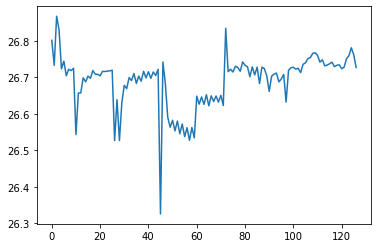

In [27]:
plt.plot(df['median_coadd_g'])

In [36]:
df.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'SNNSNMetric_nSN_Total detected',
       'median_coadd_u', 'median_coadd_g', 'median_coadd_r', 'median_coadd_i',
       'median_coadd_z', 'median_coadd_y',
       'MicrolensingMetric_detect_Fraction detected of total (mean)',
       'KNePopMetric_all__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median', 'ExgalM5_with_cuts_3x2ptFoM'],
      dtype='object')

In [37]:
# pickle would be much smaller, but I guess can zip after if we want to
df.to_hdf('combined_maf_dataframe.hdf', 'maf')
# restore with:
# df = pd.read_hdf('combined_maf_dataframe.hdf', 'maf')